### 1. get big square data

### 2. function to create big image from data

### 3. function to crop image

### 4. function to rotate crop image

### 5. run to collect embeding data


## First version building have same color with alpha

## road have different thickness with alpha


In [279]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geo_utils import *

In [280]:
highway_config = {
    "motorway": {"size": 6, "color": "red"},
    "trunk": {"size": 6, "color": "red"},
    "primary": {"size": 6, "color": "red"},
    "secondary": {"size": 5, "color": "purple"},
    "tertiary": {"size": 4, "color": "blue"},
    "unclassified": {"size": 3, "color": "blue"},
    "residential": {"size": 1, "color": "blue"},
    "other": {"size": 1, "color": "blue"},
}
building_config = {
    "=1": {"color_density_level": 1, "color": "green"},
    "=2": {"color_density_level": 2, "color": "green"},
    "=3": {"color_density_level": 3, "color": "green"},
    "=4": {"color_density_level": 4, "color": "green"},
    ">4": {"color_density_level": 5, "color": "green"},
}


def calculate_color_density(building_config: dict) -> dict:
    color_density = {}
    for key, value in building_config.items():
        color_density[key] = value["color_density_level"]
    min_color_density = min(color_density.values())
    max_color_density = max(color_density.values())
    # rescale it to 0-255
    for key, value in color_density.items():
        color_density[key] = int(
            (value - min_color_density + 1)
            / (max_color_density - min_color_density + 1)
            * 255
        )
    # update building_config
    for key, value in building_config.items():
        value["color_density"] = color_density[key]
    return building_config


building_config = calculate_color_density(building_config)
display(building_config)
tags_dict = {
    "building": {"building": True},
    "highway": {"highway": True},
    "amenity": {"amenity": True},
    "landuse": {"landuse": True},
}

DEBUG = False

{'=1': {'color_density_level': 1, 'color': 'green', 'color_density': 51},
 '=2': {'color_density_level': 2, 'color': 'green', 'color_density': 102},
 '=3': {'color_density_level': 3, 'color': 'green', 'color_density': 153},
 '=4': {'color_density_level': 4, 'color': 'green', 'color_density': 204},
 '>4': {'color_density_level': 5, 'color': 'green', 'color_density': 255}}

In [281]:
# Example usage:
latitude = lat = 14  # Example latitude for Thailand
longitude = lon = 100  # Example longitude for Thailand
dist = 800  # Example distance in meters
meter_coords = lat_lon_to_meter(latitude, longitude)
print("meter_coords:", meter_coords)

meter_coords: (607995.6522551011, 1547954.3204713617)


In [282]:
cover_radius_size = get_cover_radius_size(100)
cover_radius_size

150.0

POLYGON ((98.28555443569074 8.154171591543815, 98.30735915240105 8.154171591543815, 98.30735915240105 8.175755279595645, 98.28555443569074 8.175755279595645, 98.28555443569074 8.154171591543815))


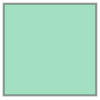

In [283]:
tags = tags_dict["building"]
lat = 8.16496343556973
lon = 98.29645679404590

cover_dist = get_cover_radius_size(dist)
bbox = ox.utils_geo.bbox_from_point((lat, lon), dist=cover_dist)

# create a new buffer polygon from this bbox geometry
polygon = ox.utils_geo.bbox_to_poly(*bbox)
print(polygon)
display(polygon)
gdf = ox.features_from_polygon(polygon, tags_dict["building"])
if DEBUG:
    gdf.explore()

In [284]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point

import pyproj


# Example usage:


building_data = get_features_from_lat_lon(lat, lon, cover_dist, tags_dict["building"])
print("Building Data:")
building_data.head()

Building Data:


amenity building layer               name     name:ru  \
element_type osmid                                                              
node         4567403725  police     roof     1  Police Checkpoint  пост ГИБДД   
             7674366534     NaN      yes   NaN     Turtle Village         NaN   
way          294907509   police     roof     1  Police Checkpoint  пост ГИБДД   
             388933683      NaN      yes   NaN                NaN         NaN   
             388933685      NaN      yes   NaN                NaN         NaN   

                             source  \
element_type osmid                    
node         4567403725  GPS survey   
             7674366534         NaN   
way          294907509   GPS survey   
             388933683          NaN   
             388933685          NaN   

                                                                  geometry  \
element_type osmid                                                           
node         4567403725                           POINT (98.30012 8.18109)   
             7674366534                           POINT (98.29625 8.16922)   
way          294907509   POLYGON ((98.29978 8.18085, 98.29999 8.18084, ...   
             388933683   POLYGON ((98.29908 8.18136, 98.29908 8.18123, ...   
             388933685   POLYGON ((98.29908 8.18113, 98.29908 8.18098, ...   

                         shop  \
element_type osmid              
node         4567403725   NaN   
             7674366534  mall   
way          294907509    NaN   
             388933683    NaN   
             388933685    NaN   

                                                                     nodes  \
element_type osmid                                                           
node         4567403725                                                NaN   
             7674366534                                                NaN   
way          294907509   [2985528498, 2985528473, 2985528481, 456740372...   
             388933683   [3921110331, 3921110324, 3921110326, 392111032...   
             388933685   [3921110319, 3921110314, 3921110316, 392111032...   

                        name:en building:levels ways type  
element_type osmid                                         
node         4567403725     NaN             NaN  NaN  NaN  
             7674366534     NaN             NaN  NaN  NaN  
way          294907509      NaN             NaN  NaN  NaN  
             388933683      NaN             NaN  NaN  NaN  
             388933685      NaN             NaN  NaN  NaN

In [285]:
drive_data = get_features_from_lat_lon(lat, lon, cover_dist, tags_dict["highway"])
print(f"Drive Data:{drive_data.shape}")
drive_data.head()

Drive Data:(226, 34)


geometry  \
element_type osmid                                                           
node         9498553079                           POINT (98.30393 8.16457)   
             9498553080                           POINT (98.30547 8.15116)   
way          84127980    LINESTRING (98.30839 8.12166, 98.30831 8.12258...   
             84137177    LINESTRING (98.31407 8.15770, 98.31414 8.15891...   
             84137184    LINESTRING (98.31465 8.17468, 98.31352 8.17495...   

                        amenity layer              name source distance  \
element_type osmid                                                        
node         9498553079     NaN   NaN    ถนนเทพกระษัตรี    NaN       13   
             9498553080     NaN   NaN               NaN    NaN        1   
way          84127980       NaN   NaN  T. Mao Khao A. ?    GPS      NaN   
             84137177       NaN   NaN               NaN    NaN      NaN   
             84137184       NaN   NaN               NaN    NaN      NaN   

                             highway              name:en         name:th  \
element_type osmid                                                          
node         9498553079    milestone  Thep Krasattri Road  ถนนเทพกระษัตรี   
             9498553080    milestone                  NaN             NaN   
way          84127980       tertiary                  NaN             NaN   
             84137177       tertiary                  NaN             NaN   
             84137184    residential                  NaN             NaN   

                             ref  ... tunnel import foot service turn:lanes  \
element_type osmid                ...                                         
node         9498553079      402  ...    NaN    NaN  NaN     NaN        NaN   
             9498553080  ภก.3033  ...    NaN    NaN  NaN     NaN        NaN   
way          84127980    ภก.3033  ...    NaN    NaN  NaN     NaN        NaN   
             84137177    ภก.2015  ...    NaN    NaN  NaN     NaN        NaN   
             84137184        NaN  ...    NaN    NaN  NaN     NaN        NaN   

                        note tracktype ways area type  
element_type osmid                                     
node         9498553079  NaN       NaN  NaN  NaN  NaN  
             9498553080  NaN       NaN  NaN  NaN  NaN  
way          84127980    NaN       NaN  NaN  NaN  NaN  
             84137177    NaN       NaN  NaN  NaN  NaN  
             84137184    NaN       NaN  NaN  NaN  NaN  

[5 rows x 34 columns]

In [286]:
# building_data.explore()

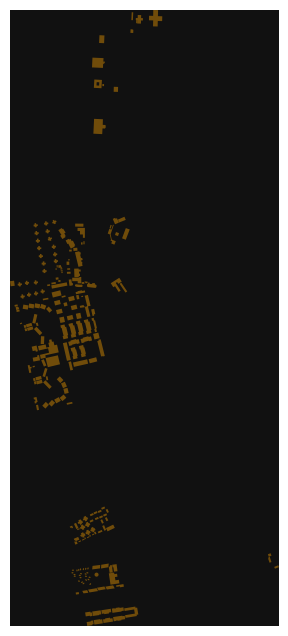

In [287]:
fig, ax = ox.plot_footprints(building_data, alpha=0.4, show=True, save=False)

In [288]:
# print unique of type of building_data columns geometry
building_data.geometry.type.unique()

array(['Point', 'Polygon'], dtype=object)

In [289]:
# check how many Point in building_data.geometry
building_data.geometry.type.value_counts()

Polygon    227
Point        2
dtype: int64

In [290]:
polygon_gdf = gpd.GeoDataFrame({"geometry": polygon}, index=[0], crs=building_data.crs)
# # create a new buffer polygon from this bbox geometry
# polygon = ox.utils_geo.bbox_to_poly(*bbox)

In [291]:
if DEBUG:
    polygon.explore()

In [292]:
# if we want to know how many area/ lenght in this grid we have to use this method to calculate
# Intersect building geometries with the square
intersected_buildings = building_data.copy()
# remove Point in geometry
intersected_buildings = intersected_buildings[
    intersected_buildings.geometry.type != "Point"
]
intersected_buildings = gpd.overlay(
    intersected_buildings, polygon_gdf, how="intersection"
)

# Plot the intersected building footprints
if DEBUG:
    intersected_buildings.explore()

In [293]:
intersected_buildings["building:levels"].unique()

array([nan, '5'], dtype=object)

In [294]:
building_data["building:levels"].unique()

array([nan, '5'], dtype=object)

In [295]:
processed_building_data = preprocess_features(
    building_data,
    tags=tags_dict["building"],
)

In [296]:
processed_building_data["building:levels"].unique()

array([1, 5])

In [297]:
processed_building_data.columns

Index(['amenity', 'building', 'layer', 'name', 'name:ru', 'source', 'geometry',
       'shop', 'nodes', 'name:en', 'building:levels', 'ways', 'type'],
      dtype='object')

In [298]:
processed_building_data.building.unique()

array(['roof', 'yes', 'apartments', 'kiosk', 'house'], dtype=object)

In [299]:
processed_building_data.amenity.unique()

array(['police', nan, 'fuel', 'courthouse', 'restaurant'], dtype=object)

In [300]:
highway_config
building_config

{'=1': {'color_density_level': 1, 'color': 'green', 'color_density': 51},
 '=2': {'color_density_level': 2, 'color': 'green', 'color_density': 102},
 '=3': {'color_density_level': 3, 'color': 'green', 'color_density': 153},
 '=4': {'color_density_level': 4, 'color': 'green', 'color_density': 204},
 '>4': {'color_density_level': 5, 'color': 'green', 'color_density': 255}}

In [301]:
dpi = 600
edge_linewidth = dpi / 600 / 2
plot_bbox = get_plot_bbox_from_polygon_gdf(polygon_gdf)

In [302]:
import webcolors


def get_rgb_from_color_name(color_name: str) -> tuple:
    if color_name == "green":
        color_name = "lime"
    try:
        # Get RGB values for the color name
        rgb_values = webcolors.name_to_rgb(color_name)
        print(f"RGB values for {color_name}: {rgb_values}")
    except ValueError:
        raise f"Unable to find RGB values for {color_name}"
    rgb_tuple = tuple([x for x in rgb_values])
    return rgb_tuple


get_rgb_from_color_name("green")

RGB values for lime: IntegerRGB(red=0, green=255, blue=0)


(0, 255, 0)

=1
RGB values for lime: IntegerRGB(red=0, green=255, blue=0)
[0, 51, 0]
#003300
selected_data.shape (220, 13)
=2
RGB values for lime: IntegerRGB(red=0, green=255, blue=0)
[0, 102, 0]
#006600
selected_data.shape (0, 13)
=3
RGB values for lime: IntegerRGB(red=0, green=255, blue=0)
[0, 153, 0]
#009900
selected_data.shape (0, 13)
=4
RGB values for lime: IntegerRGB(red=0, green=255, blue=0)
[0, 204, 0]
#00cc00
selected_data.shape (0, 13)
>4
RGB values for lime: IntegerRGB(red=0, green=255, blue=0)
[0, 255, 0]
#00ff00
selected_data.shape (9, 13)


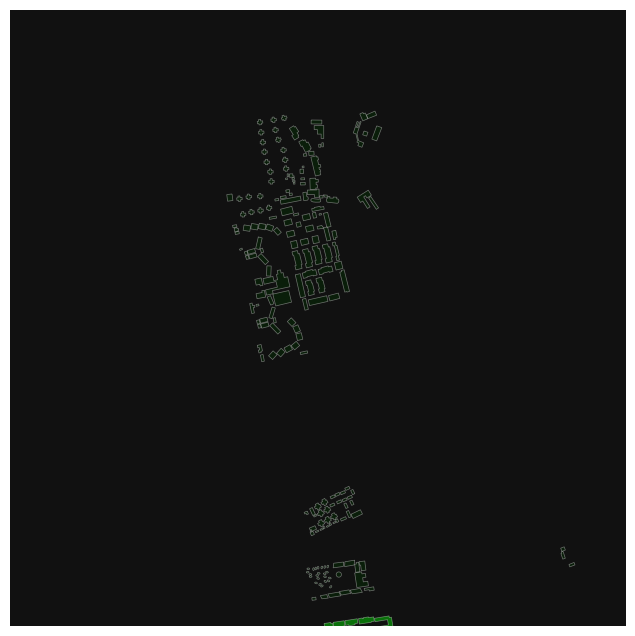

In [303]:
ax = None

for floor_condition, config in building_config.items():
    print(floor_condition)

    expression = floor_condition[0]
    expression_value = int(floor_condition[1:])

    rgb_tuple = get_rgb_from_color_name(config["color"])
    rgb_tuple = [int(rgb / 255 * config["color_density"]) for rgb in rgb_tuple]
    print(rgb_tuple)
    hex_color = "#{:02x}{:02x}{:02x}".format(*rgb_tuple)
    if expression == "=":
        selected_data = processed_building_data[
            processed_building_data["building:levels"] == expression_value
        ]
    elif expression == ">":
        selected_data = processed_building_data[
            processed_building_data["building:levels"] > expression_value
        ]
    elif expression == "<":
        selected_data = processed_building_data[
            processed_building_data["building:levels"] < expression_value
        ]
    else:
        raise f"Expression {expression} is not supported"
    print(hex_color)
    print("selected_data.shape", selected_data.shape)
    if selected_data.shape[0] == 0:
        continue
    fig, ax = ox.plot_footprints(
        selected_data,
        ax=ax,
        alpha=0.4,
        edge_linewidth=edge_linewidth,
        edge_color="white",
        show=False,
        color=hex_color,
        bbox=plot_bbox,
        dpi=dpi,
    )

In [304]:
# landuse_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["landuse"])
# landuse_data.explore()

In [305]:
# landuse_data.landuse.unique()

In [306]:
# ax = None

# for floor_condition, config in building_config.items():
#     print(floor_condition)

#     expression = floor_condition[0]
#     expression_value = int(floor_condition[1:])

#     rgb_tuple = get_rgb_from_color_name(config["color"])
#     rgb_tuple = [int(rgb / 255 * config["color_density"]) for rgb in rgb_tuple]
#     print(rgb_tuple)
#     hex_color = "#{:02x}{:02x}{:02x}".format(*rgb_tuple)
#     if expression == "=":
#         selected_data = processed_building_data[
#             processed_building_data["building:levels"] == expression_value
#         ]
#     elif expression == ">":
#         selected_data = processed_building_data[
#             processed_building_data["building:levels"] > expression_value
#         ]
#     elif expression == "<":
#         selected_data = processed_building_data[
#             processed_building_data["building:levels"] < expression_value
#         ]
#     else:
#         raise f"Expression {expression} is not supported"
#     print(hex_color)
#     print("selected_data.shape", selected_data.shape)
#     if selected_data.shape[0] == 0:
#         continue
#     fig, ax = ox.plot_footprints(
#         selected_data,
#         ax=ax,
#         alpha=0.4,
#         edge_linewidth=edge_linewidth,
#         edge_color="white",
#         show=False,
#         color=hex_color,
#         bbox=plot_bbox,
#         dpi=dpi,
#     )

In [307]:
buffer_drive_data = drive_data.copy()


# add road_size according to highway_config
def get_road_size(highway_value, default_size):
    return highway_config.get(highway_value, {"size": default_size})["size"]


# Assuming buffer_drive_data is a pandas DataFrame
buffer_drive_data["road_size"] = buffer_drive_data["highway"].apply(
    lambda x: get_road_size(x, default_size=highway_config["other"]["size"])
)

# buffer_drive_data["geometry"] = buffer_drive_data.buffer(0.00001)
# # buffer_drive_data["geometry"] = buffer_drive_data.buffer(0.00010)
# buffer_drive_data.head()
# buffer_drive_data
buffer_drive_data["road_size"].unique()
# buffer 0.00001 * road_size
buffer_drive_data["geometry"] = buffer_drive_data.apply(
    lambda x: x.geometry.buffer(0.00001 * x.road_size), axis=1
)

other {'size': 1, 'color': 'blue'}
RGB values for blue: IntegerRGB(red=0, green=0, blue=255)
(0, 0, 255)
#0000ff
selected_data.shape (226, 35)


<Figure size 640x480 with 0 Axes>

motorway {'size': 6, 'color': 'red'}
RGB values for red: IntegerRGB(red=255, green=0, blue=0)
(255, 0, 0)
#ff0000
selected_data.shape (0, 35)
trunk {'size': 6, 'color': 'red'}
RGB values for red: IntegerRGB(red=255, green=0, blue=0)
(255, 0, 0)
#ff0000
selected_data.shape (0, 35)
primary {'size': 6, 'color': 'red'}
RGB values for red: IntegerRGB(red=255, green=0, blue=0)
(255, 0, 0)
#ff0000
selected_data.shape (17, 35)


<Figure size 640x480 with 0 Axes>

secondary {'size': 5, 'color': 'purple'}
RGB values for purple: IntegerRGB(red=128, green=0, blue=128)
(128, 0, 128)
#800080
selected_data.shape (0, 35)
tertiary {'size': 4, 'color': 'blue'}
RGB values for blue: IntegerRGB(red=0, green=0, blue=255)
(0, 0, 255)
#0000ff
selected_data.shape (2, 35)


<Figure size 640x480 with 0 Axes>

unclassified {'size': 3, 'color': 'blue'}
RGB values for blue: IntegerRGB(red=0, green=0, blue=255)
(0, 0, 255)
#0000ff
selected_data.shape (4, 35)


<Figure size 640x480 with 0 Axes>

residential {'size': 1, 'color': 'blue'}
RGB values for blue: IntegerRGB(red=0, green=0, blue=255)
(0, 0, 255)
#0000ff
selected_data.shape (32, 35)


<Figure size 640x480 with 0 Axes>

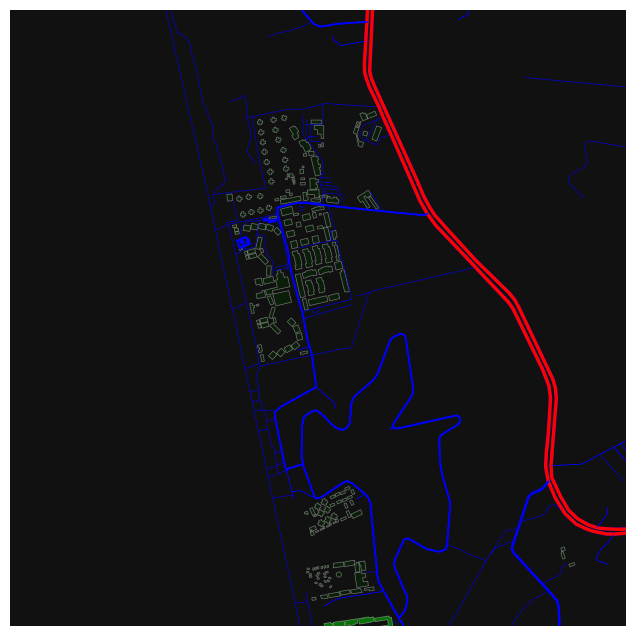

In [308]:
# ax = None
road_type_list = list(highway_config.keys())
road_type_list.remove("other")
road_type_list = ["other"] + road_type_list
for road_type in road_type_list:
    config = highway_config[road_type]
    print(road_type, config)
    rgb_tuple = get_rgb_from_color_name(config["color"])
    print(rgb_tuple)
    hex_color = "#{:02x}{:02x}{:02x}".format(*rgb_tuple)
    if road_type == "other":
        selected_data = buffer_drive_data
    else:
        selected_data = buffer_drive_data[buffer_drive_data["highway"] == road_type]
    print(hex_color)
    print("selected_data.shape", selected_data.shape)
    if selected_data.shape[0] == 0:
        continue
    fig, ax = ox.plot_footprints(
        selected_data,
        ax=ax,
        alpha=1,
        # edge_linewidth=edge_linewidth,
        # edge_color="white",
        show=True,
        color=hex_color,
        bbox=plot_bbox,
        dpi=dpi,
    )
fig

In [309]:
water_data = ox.geometries_from_point(
    (lat, lon), dist=cover_dist, tags={"natural": "coastline"}
)
if DEBUG:
    water_data.explore()

/var/folders/9g/3rr3k99j0td2974k71sy46_h0000gp/T/ipykernel_75701/1381361115.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  water_data = ox.geometries_from_point(


In [310]:
type(polygon)

shapely.geometry.polygon.Polygon

In [311]:
# fig, ax = ox.plot_footprints(
#     water_data.geometry.buffer(0.00001),
#     ax=ax,
#     alpha=1,
#     # edge_linewidth=edge_linewidth,
#     # edge_color="white",
#     show=True,
#     color=hex_color,
#     bbox=plot_bbox,
#     dpi=dpi,
# )

In [312]:
drive_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [313]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import transform
import pyproj


def create_circle_polygon(center_lat, center_lon, radius):
    # Create a Point geometry for the circle center
    center_point = Point(center_lon, center_lat)
    target_crs = pyproj.CRS("EPSG:4326")
    gdf = gpd.GeoDataFrame(geometry=[center_point])
    gdf = gdf.set_crs(target_crs)
    gdf["geometry"] = gdf.geometry.buffer(radius)

    return gdf


# Specify center coordinates and radius in lat/lon (Thailand)
center_lat = lat
center_lon = lon
radius_meters = 0.0001  # Adjust the radius as needed

circle_polygon = create_circle_polygon(center_lat, center_lon, radius_meters)
display(circle_polygon)
if DEBUG:
    circle_polygon.explore()
# Plot the circle polygon (optional)
# gdf = gpd.GeoDataFrame(geometry=[circle_polygon])
# gdf.crs = "EPSG:4326"  # Set the coordinate reference system to lat/lon for visualization
# ax = gdf.plot(alpha=0.5, edgecolor='k', figsize=(8, 8))
# ax.set_title('Circular Polygon')

/var/folders/9g/3rr3k99j0td2974k71sy46_h0000gp/T/ipykernel_75701/518210443.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["geometry"] = gdf.geometry.buffer(radius)


geometry
0  POLYGON ((98.29656 8.16496, 98.29656 8.16495, ...

In [314]:
circle_polygon

geometry
0  POLYGON ((98.29656 8.16496, 98.29656 8.16495, ...

In [315]:
type(circle_polygon)

geopandas.geodataframe.GeoDataFrame

In [316]:
type(drive_data)

geopandas.geodataframe.GeoDataFrame

<Figure size 640x480 with 0 Axes>

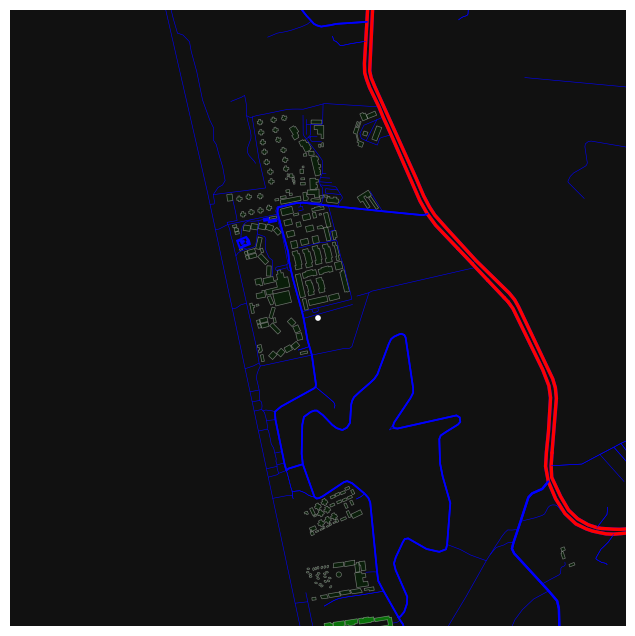

In [317]:
fig, ax = ox.plot_footprints(
    circle_polygon,
    ax=ax,
    alpha=1,
    # edge_linewidth=edge_linewidth,
    # edge_color="white",
    show=True,
    color="white",
    bbox=plot_bbox,
    dpi=dpi,
)
fig

In [318]:
type(fig)

matplotlib.figure.Figure

In [319]:
import matplotlib.figure as fig

In [320]:
fig.Figure

matplotlib.figure.Figure

In [359]:
lat, lon = 13.989424, 100.617206

In [360]:
from geo_save_image import get_features_from_lat_lon

drive_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["highway"])

In [361]:
drive_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [362]:
# target_crs = pyproj.CRS("EPSG:32647")  # UTM Zone 47N (covers parts of Thailand)
target_crs = pyproj.CRS("EPSG:3857")
drive_data = drive_data.to_crs(target_crs)
drive_data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [363]:
def buffer_road_metre(buffer_drive_data, road_size=1):
    # Assuming buffer_drive_data is a pandas DataFrame
    buffer_drive_data["geometry"] = buffer_drive_data.apply(
        lambda x: x.geometry.buffer(road_size / 2), axis=1
    )
    return buffer_drive_data

In [364]:
buffer_drive_data = buffer_road_metre(drive_data, road_size=1)

In [365]:
buffer_drive_data.explore()

In [366]:
bbox = drive_data.total_bounds

In [388]:
# convert lat lon to meter with target_crs
from geo_utils import get_bbox_polygon_from_lat_lon

print(lat, lon)
bbox_polygon = get_bbox_polygon_from_lat_lon(lat, lon, 800)
print(bbox_polygon)

13.989424 100.617206
POLYGON ((100.60979152674673 13.982229437316057, 100.62462047325326 13.982229437316057, 100.62462047325326 13.996618562683942, 100.60979152674673 13.996618562683942, 100.60979152674673 13.982229437316057))


In [389]:
bbox_polygon
latlon_crs = pyproj.CRS("EPSG:4326")
meter_crs = pyproj.CRS("EPSG:3857")
polygon_gdf = gpd.GeoDataFrame({"geometry": bbox_polygon}, index=[0], crs=latlon_crs)
polygon_gdf = polygon_gdf.to_crs(meter_crs)

In [390]:
polygon_gdf.explore()

In [391]:
bbox = polygon_gdf.total_bounds

In [392]:
w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]
w, h

(1650.7507741078734, 1650.7507789845113)

In [372]:
spacing = 100
grid_points = []

x_min, y_min, x_max, y_max = bbox

for x in range(int(x_min) + spacing // 2, int(x_max), spacing):
    for y in range(int(y_min) + spacing // 2, int(y_max), spacing):
        point = Point(x, y)
        grid_points.append(point)
print(len(grid_points))
# Create a GeoDataFrame from the grid points
grid_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=meter_crs)

289


In [373]:
grid_gdf.explore()

In [374]:
side_length = spacing  # 50 meters

# Create a buffer around the grid points with the specified side length
buffered_grid_gdf = grid_gdf.copy()  # Make a copy to preserve the original data
buffered_grid_gdf["geometry"] = buffered_grid_gdf["geometry"].buffer(
    side_length / 2, cap_style=3
)

In [375]:
buffered_grid_gdf.explore()

In [376]:
buffered_grid_gdf["grid_id"] = buffered_grid_gdf.index

In [377]:
import math


def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface given their latitude and longitude
    in decimal degrees.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Radius of Earth in kilometers (mean value)
    radius_earth = 6371.0

    # Calculate the distance
    distance = radius_earth * c * 1000  # Convert to meters
    return distance


# Example usage:
lat1, lon1 = 8.157768872885788, 98.28918855514246  # San Francisco coordinates
lat2, lon2 = 8.157768872885788, 98.30372503294933  # Los Angeles coordinates

distance = haversine(lat1, lon1, lat2, lon2)
print(f"Distance: {distance:.2f} meters")

Distance: 1600.03 meters


In [378]:
bbox_polygon.length

0.05843614374882122

In [379]:
intersection_gdf = gpd.overlay(buffered_grid_gdf, buffer_drive_data, how="intersection")

In [380]:
road_value_dict = {
    "motorway": 1,
    "trunk": 1,
    "primary": 1,
    "secondary": 1,
    "tertiary": 1,
    "unclassified": 1,
    "residential": 1,
}

In [381]:
intersection_gdf.highway.unique()

array(['unclassified', 'residential', 'service', 'primary',
       'primary_link', 'footway', 'steps', 'bus_stop', 'motorway_link',
       'secondary_link', 'secondary', 'trunk_link', 'trunk', 'motorway',
       'motorway_junction', 'crossing', 'living_street'], dtype=object)

In [382]:
intersection_gdf.shape

(1705, 47)

In [383]:
buffered_grid_gdf.shape

(289, 2)

In [384]:
# add road_area in buffered_grid_gdf from intersection_gdf['geometry'].area by grid_id
buffered_grid_gdf["road_length"] = 0
for key in intersection_gdf.highway.unique():
    buffered_grid_gdf["road_length_" + key] = 0
for index, row in intersection_gdf.iterrows():
    grid_id = row["grid_id"]
    road_type = row["highway"]
    area = row["geometry"].area
    # print("road_type", road_type)
    buffered_grid_gdf.loc[grid_id, "road_length_" + road_type] += area
for index in buffered_grid_gdf.index:
    grid_id = index
    grid_lat_id = grid_id % 16
    grid_lon_id = grid_id // 16
    buffered_grid_gdf.loc[grid_id, "grid_lat_id"] = grid_lat_id
    buffered_grid_gdf.loc[grid_id, "grid_lon_id"] = grid_lon_id
# sum road length
for key in intersection_gdf.highway.unique():
    buffered_grid_gdf["road_length"] += buffered_grid_gdf["road_length_" + key]
# drop buffered_grid_gdf where road_area = 0
# buffered_grid_gdf = buffered_grid_gdf[buffered_grid_gdf["road_length"] != 0]

In [385]:
buffered_grid_gdf.explore()

In [386]:
buffered_grid_gdf[buffered_grid_gdf["road_length"] != 0].explore()

In [387]:
buffered_grid_gdf.head()

geometry  grid_id  road_length  \
0  POLYGON ((11199930.000 1572277.000, 11199930.0...        0   270.920089   
1  POLYGON ((11199930.000 1572377.000, 11199930.0...        1   100.019599   
2  POLYGON ((11199930.000 1572477.000, 11199930.0...        2   178.993604   
3  POLYGON ((11199930.000 1572577.000, 11199930.0...        3   265.764398   
4  POLYGON ((11199930.000 1572677.000, 11199930.0...        4   261.898927   

   road_length_unclassified  road_length_residential  road_length_service  \
0                205.589647                65.330442             0.000000   
1                  0.000000               100.019599             0.000000   
2                  0.000000               178.993604             0.000000   
3                  0.000000               265.764398             0.000000   
4                  0.000000               245.405289            16.493638   

   road_length_primary  road_length_primary_link  road_length_footway  \
0                  0.0                       0.0                  0.0   
1                  0.0                       0.0                  0.0   
2                  0.0                       0.0                  0.0   
3                  0.0                       0.0                  0.0   
4                  0.0                       0.0                  0.0   

   road_length_steps  ...  road_length_secondary_link  road_length_secondary  \
0                0.0  ...                         0.0                    0.0   
1                0.0  ...                         0.0                    0.0   
2                0.0  ...                         0.0                    0.0   
3                0.0  ...                         0.0                    0.0   
4                0.0  ...                         0.0                    0.0   

   road_length_trunk_link  road_length_trunk  road_length_motorway  \
0                     0.0                0.0                   0.0   
1                     0.0                0.0                   0.0   
2                     0.0                0.0                   0.0   
3                     0.0                0.0                   0.0   
4                     0.0                0.0                   0.0   

   road_length_motorway_junction  road_length_crossing  \
0                            0.0                   0.0   
1                            0.0                   0.0   
2                            0.0                   0.0   
3                            0.0                   0.0   
4                            0.0                   0.0   

   road_length_living_street  grid_lat_id  grid_lon_id  
0                        0.0          0.0          0.0  
1                        0.0          1.0          0.0  
2                        0.0          2.0          0.0  
3                        0.0          3.0          0.0  
4                        0.0          4.0          0.0  

[5 rows x 22 columns]

In [347]:
from PIL import Image
import numpy as np


def hex_to_rgb(hex_color):
    return tuple(int(hex_color[i : i + 2], 16) for i in (0, 2, 4))


def euclidean_distance(color1, color2):
    return np.linalg.norm(np.array(color1) - np.array(color2))


def get_nearest_color(rgb, color_dict):
    distances = {
        name: euclidean_distance(rgb, hex_to_rgb(hex_code))
        for name, hex_code in color_dict.items()
    }
    return min(distances, key=distances.get)


def extract_rgb_grid_from_image(image_path: str, color_dict: dict):
    img = Image.open(image_path)
    img = img.convert("RGB")

    width, height = img.size
    pixel_data = list(img.getdata())

    color_count = {name: 0 for name in color_dict}

    for pixel in pixel_data:
        nearest_color = get_nearest_color(pixel, color_dict)
        color_count[nearest_color] += 1

    return color_count


color_hex_dict = {
    "green": "82D375",
    "orange": "F19C5B",
    "red": "E04C3E",
    "maroon": "762824",
    "white": "FFFFFF",
    "grey": "E5E3E0",
}
# Example usage:
image_path = "/Users/user/Documents/Coding/geo/notebook/data_chester_weekday_12/full_image/153-OPRCD10057.png"
# result = extract_rgb_grid_from_image(image_path, color_hex_dict)
print(result)

{'green': 121405, 'orange': 10110, 'red': 1055, 'maroon': 243, 'white': 31941, 'grey': 2013822}


In [348]:
def hex_to_rgb(hex_color):
    # Convert hex to RGB
    r = int(hex_color[0:2], 16)
    g = int(hex_color[2:4], 16)
    b = int(hex_color[4:6], 16)
    return r, g, b


color_rgb_dict = {key: hex_to_rgb(value) for key, value in color_hex_dict.items()}
color_rgb_dict

{'green': (130, 211, 117),
 'orange': (241, 156, 91),
 'red': (224, 76, 62),
 'maroon': (118, 40, 36),
 'white': (255, 255, 255),
 'grey': (229, 227, 224)}

In [349]:
img = Image.open(image_path)
img = img.convert("RGB")

width, height = img.size
pixel_data = list(img.getdata())

In [350]:
from PIL import Image
import pandas as pd
import numpy as np
from scipy.spatial import distance


def find_nearest_color_with_cache(rgb_tuple, color_cache):
    # Check if the color is already in the cache
    if rgb_tuple in color_cache:
        return color_cache[rgb_tuple]

    # If not in the cache, find the nearest color
    nearest_color = min(
        color_rgb_dict.keys(),
        key=lambda x: distance.euclidean(rgb_tuple, color_rgb_dict[x]),
    )

    # Update the cache
    color_cache[rgb_tuple] = nearest_color

    return nearest_color


color_cache = {}


def extract_data_from_image(image_path):
    # Open the image
    img = Image.open(image_path).convert("RGB")

    # Get the image data as a NumPy array
    img_array = np.array(img)

    # Get the dimensions of the image
    height, width, _ = img_array.shape

    # Initialize lists to store x, y, and color data
    x_values = []
    y_values = []
    color_values = []

    # Iterate through the image pixels
    for y in range(height):
        for x in range(width):
            # Get the RGB color values
            r, g, b = img_array[y, x]

            # Append x, y, and color values to the lists
            x_values.append(x)
            y_values.append(y)
            color_values.append((r, g, b))

    # Create a DataFrame from the lists
    df = pd.DataFrame({"x": x_values, "y": y_values, "color": color_values})

    # Apply the function to create the 'nearest_color' column
    df["nearest_color"] = df["color"].apply(
        lambda x: find_nearest_color_with_cache(x, color_cache)
    )

    return df


# Example usage
image_path = "/Users/user/Documents/Coding/geo/notebook/data_chester_weekday_12/full_image/153-OPRCD10057.png"
df = extract_data_from_image(image_path)

# Display the DataFrame

In [351]:
df["nearest_color"].unique()

array(['grey', 'green', 'white', 'orange', 'red', 'maroon'], dtype=object)

In [352]:
df["display_color"] = df["nearest_color"].apply(lambda x: color_rgb_dict[x])
df.head()

x  y            color nearest_color    display_color
0  0  0  (229, 227, 224)          grey  (229, 227, 224)
1  1  0  (229, 227, 224)          grey  (229, 227, 224)
2  2  0  (229, 227, 224)          grey  (229, 227, 224)
3  3  0  (229, 227, 224)          grey  (229, 227, 224)
4  4  0  (229, 227, 224)          grey  (229, 227, 224)

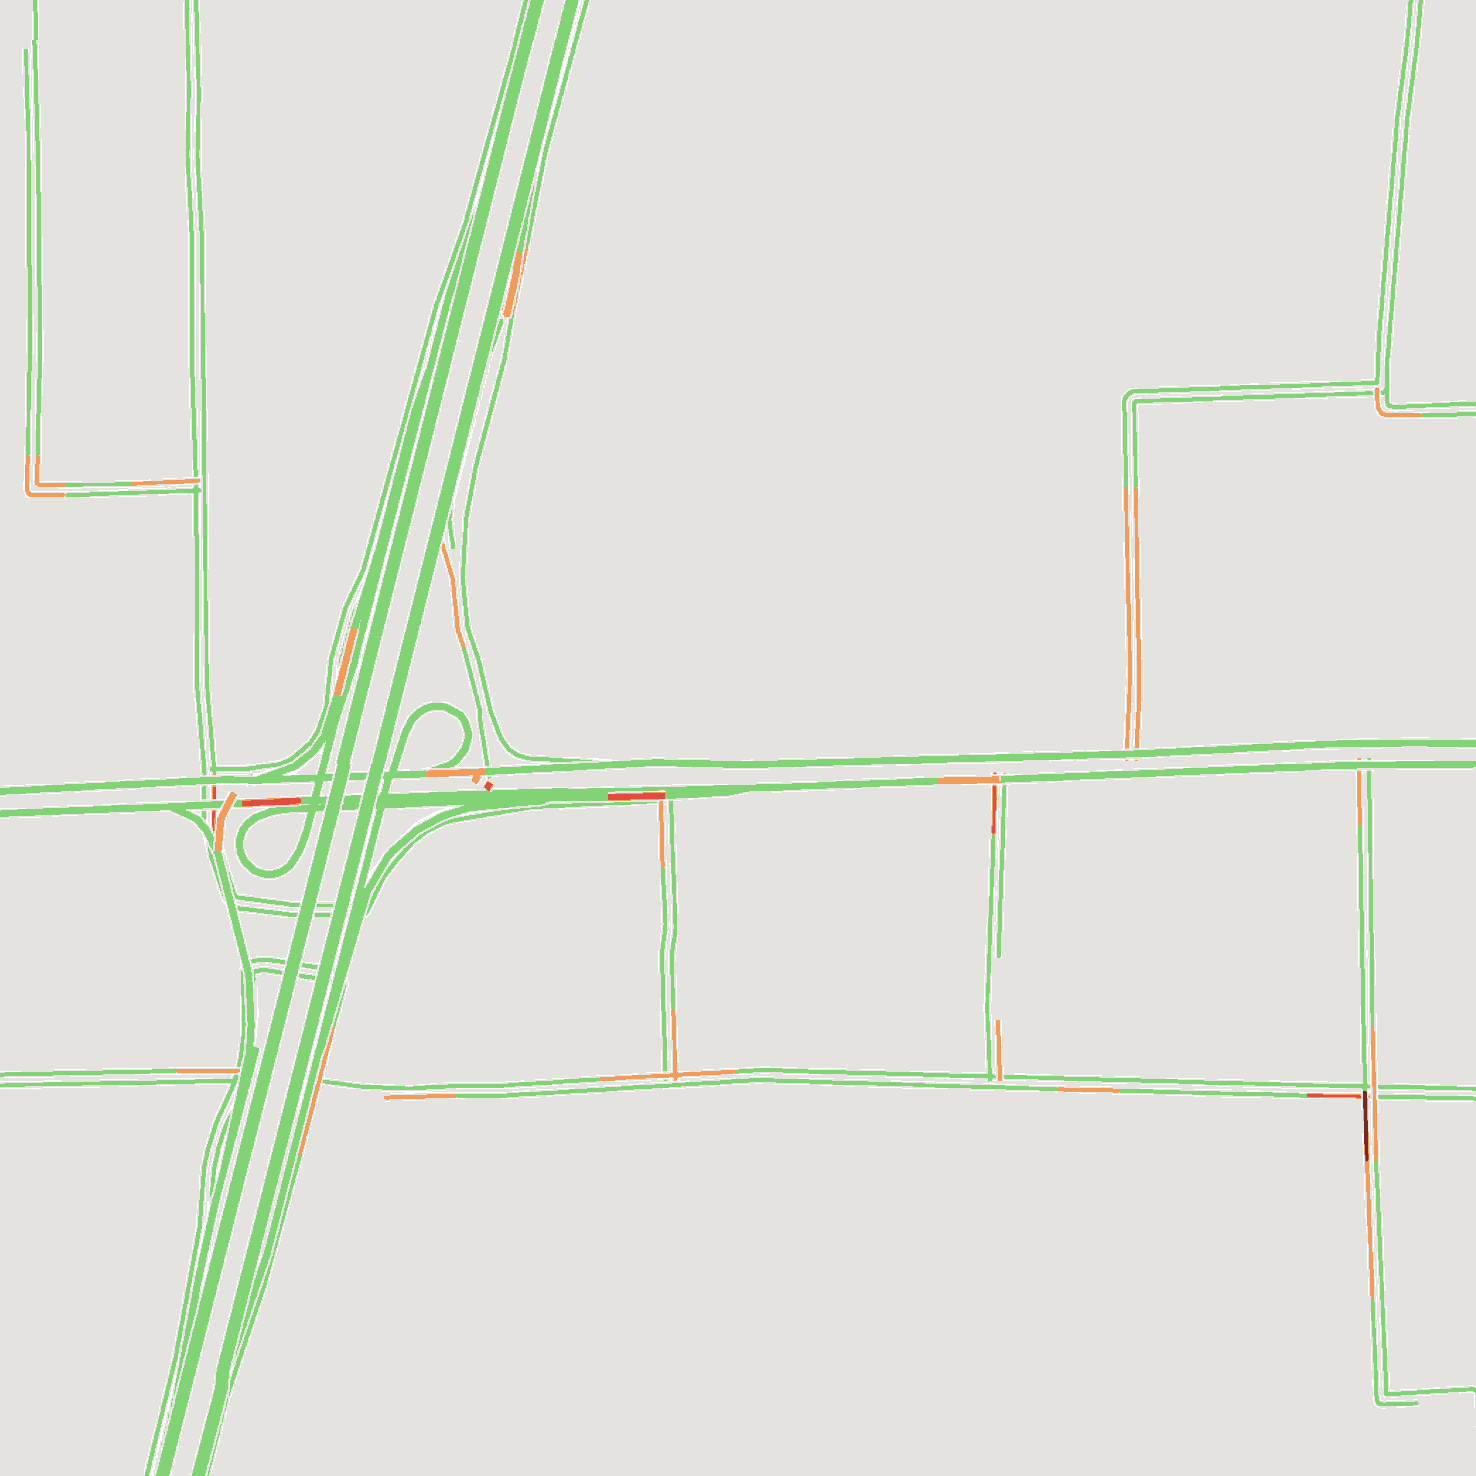

In [393]:
# create image from x y display_color
import numpy as np
from PIL import Image

image = Image.new("RGB", (width, height))
image.putdata(df["display_color"])
image

In [ ]:
# save image

In [354]:
rgb_pixel_df = df

In [355]:
def group_rgb_pixel_to_grid(rgb_pixel_df: pd.DataFrame, num_grid: int = 16):
    rgb_grid_df = rgb_pixel_df.copy()
    x_min = rgb_grid_df["x"].min()
    x_max = rgb_grid_df["x"].max()
    y_min = rgb_grid_df["y"].min()
    y_max = rgb_grid_df["y"].max()
    # want to group it into grid 16x16
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_spacing = x_range / (num_grid - 1)
    y_spacing = y_range / (num_grid - 1)

    rgb_grid_df["grid_lon_id"] = rgb_grid_df["x"].apply(
        lambda x: int((x + x_spacing / 2 - x_min) / x_spacing)
    )
    rgb_grid_df["grid_lat_id"] = rgb_grid_df["y"].apply(
        lambda y: int((y + y_spacing / 2 - y_min) / y_spacing)
    )

    # i want to count how many each color in each grid
    rgb_grid_df = (
        rgb_grid_df.groupby(["grid_lon_id", "grid_lat_id", "nearest_color"])
        .size()
        .reset_index(name="count")
    )
    pivot_df = rgb_grid_df.pivot_table(
        index=["grid_lon_id", "grid_lat_id"],
        columns="nearest_color",
        values="count",
        fill_value=0,
    ).reset_index()

    # pivot_df drop nearest_color
    # move nearest_color out of index
    pivot_df.columns.name = None
    # drop white and grey
    pivot_df = pivot_df.drop(["white", "grey"], axis=1)

    return pivot_df


group_rgb_pixel_to_grid(rgb_pixel_df)

grid_lon_id  grid_lat_id  green  maroon  orange  red
0              0            0    204       0       0    0
1              0            1    758       0       0    0
2              0            2    774       0       0    0
3              0            3    795       0       0    0
4              0            4    764       0       0    0
..           ...          ...    ...     ...     ...  ...
251           15           11    383       0       0    0
252           15           12      0       0       0    0
253           15           13      0       0       0    0
254           15           14    196       0       0    0
255           15           15      0       0       0    0

[256 rows x 6 columns]

In [356]:
rgb_pixel_df.head()

x  y            color nearest_color    display_color
0  0  0  (229, 227, 224)          grey  (229, 227, 224)
1  1  0  (229, 227, 224)          grey  (229, 227, 224)
2  2  0  (229, 227, 224)          grey  (229, 227, 224)
3  3  0  (229, 227, 224)          grey  (229, 227, 224)
4  4  0  (229, 227, 224)          grey  (229, 227, 224)